In [1]:
import kplr 
client = kplr.API()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy
import astropy.stats
import astropy
from astropy.stats import LombScargle
import math

In [2]:
starsample = client.star(11754974)
curves=starsample.get_light_curves(short_cadence=True, fetch=True, clobber=False)
time, flux, flerr = np.array([]), np.array([]), np.array([])
short_curves, long_curves = [], []
for lc in curves:
    if "llc" in lc.filename:
        long_curves.append(lc)
    else:
        short_curves.append(lc)
for lc in short_curves:
    print(lc.filename)
    with lc.open() as f:
        thisdata = f[1].data
        thistime = thisdata["time"]
        thisflux = thisdata["pdcsap_flux"]
        thisflerr = thisdata["pdcsap_flux_err"]
        time = np.concatenate((time, thistime))
        flux = np.concatenate((flux, thisflux))
        flerr = np.concatenate((flerr, thisflerr))
time.shape, flux.shape, flerr.shape

/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2009291181958_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010203174610_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010234115140_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010265121752_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010296114515_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010326094124_slc.fits
/Users/abs/.kplr/data/lightcurves/011754974/kplr011754974-2010355172524_slc.fits


((302790,), (302790,), (302790,))

In [3]:
time2=time[0:302792]
flux2=flux[0:302792]

undef_points=0
timelist=[]
fluxlist=[]

for i in range (302790):
    if math.isnan(flux2[i]) == True:
        undef_points=undef_points+1
        #print (i)
        #print (flux2[i])
    if math.isnan(flux2[i])== False:
        timelist.append(time2[i])
        fluxlist.append(flux2[i])

time3 = np.asarray(timelist)
flux3=np.asarray(fluxlist)

print (time3)
print (flux3)

[260.21510805 260.21578923 260.21647031 ... 719.5570923  719.55777348
 719.55845456]
[126723.3515625 126704.078125  126651.171875  ... 126900.84375
 126545.2578125 126232.4375   ]


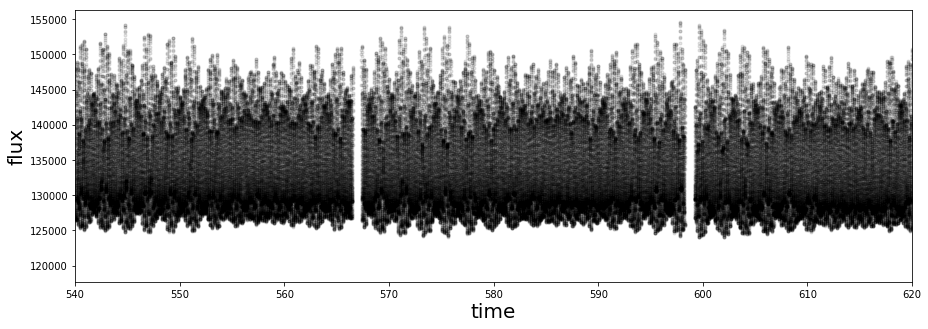

In [4]:
plt.figure(figsize=(15,5))
plt.plot(time, flux,"k.", alpha=0.1)
plt.xlim(540,620)
plt.xlabel("time",fontsize=20)
plt.ylabel("flux",fontsize=20)
plt.show()

In [5]:
q,y= LombScargle(time3,flux3).autopower()

(0, 40)

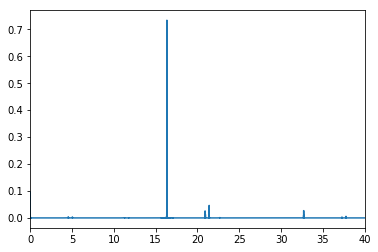

In [6]:
plt.plot(q,y)
plt.xlim(0,40)

In [7]:
len(flux)

302790

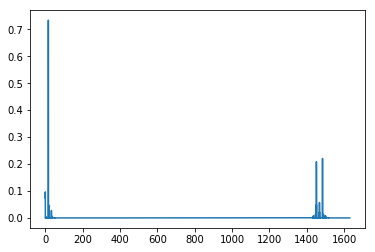

In [8]:
plt.plot(q,y)

(1400, 1550)

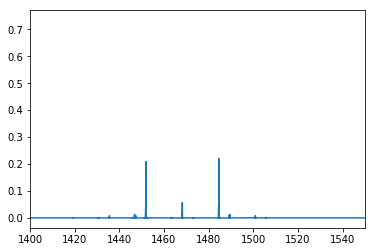

In [9]:
plt.plot(q,y)
plt.xlim(1400,1550)

(-0.0001, 0.001)

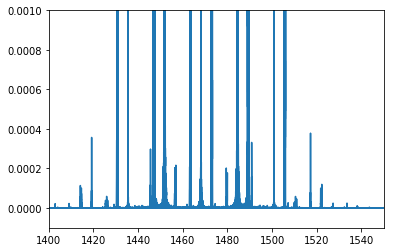

In [10]:
plt.plot(q,y)
plt.xlim(1400,1550)
plt.ylim(-0.0001, 0.001)

(-1e-05, 0.0001)

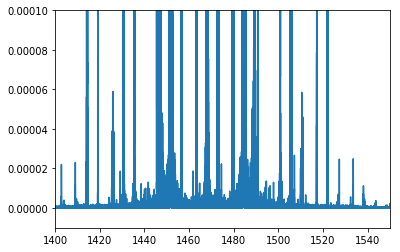

In [11]:
plt.plot(q,y)
plt.xlim(1400,1550)
plt.ylim(-0.00001, 0.0001)

(-1e-06, 1e-05)

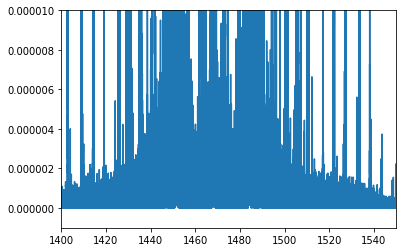

In [12]:
plt.plot(q,y)
plt.xlim(1400,1550)
plt.ylim(-0.000001, 0.00001)

(-1e-07, 1e-06)

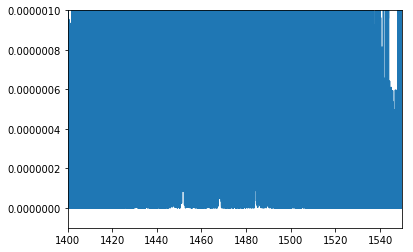

In [13]:
plt.plot(q,y)
plt.xlim(1400,1550)
plt.ylim(-0.0000001, 0.000001)